In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt


In [3]:
df = pd.read_csv("C:\Users\David\Data Mining Project\loan.csv")

In [93]:
df.isnull().values.any()
# check for null values
# Dataset has already been cleaned so there is no need to remove null values

False

In [4]:
outliers = df[df['loan_amount'] > df['loan_amount'].mean() + 3 * df['loan_amount'].std()] 
outliers

#checking for outliers, but the dataset has already been cleaned so there is none.




,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region


In [95]:
df.annual_inc.mean()
stat1=df.groupby('year').loan_amount.agg(['count', 'mean', 'min', 'max'])

In [10]:
df1 = pd.DataFrame(stat1)

In [11]:
df1

,count,mean,min,max
year,,,,
2007,603,8254.519071,500,25000
2008,2393,8825.428333,500,25000
2009,5281,9833.033516,1000,25000
2010,12537,10528.240408,1000,25000
2011,21721,12047.503568,1000,35000
2012,53367,13461.709015,1000,35000
2013,134755,14708.094134,1000,35000
2014,235628,14870.177462,1000,35000
2015,421094,15240.255561,1000,35000


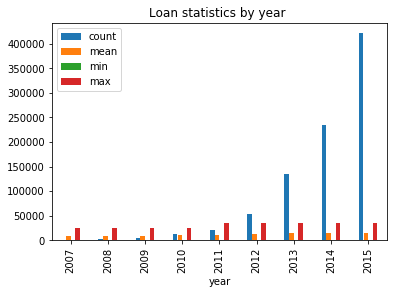

In [12]:
df1.plot(kind='bar', title='Loan statistics by year ')

In [13]:
# Number of loans greatly increases each year

In [14]:
stat2=df.groupby('region').loan_amount.agg(['count', 'mean', 'min', 'max'])

In [15]:
df2 = pd.DataFrame(stat2)

In [16]:
df2

,count,mean,min,max
region,,,,
Northern-Irl,204399,14926.927358,500,35000
cannught,155029,14550.319456,500,35000
leinster,214646,14622.685142,500,35000
munster,104574,15232.329977,500,35000
ulster,208731,14636.708970,500,35000


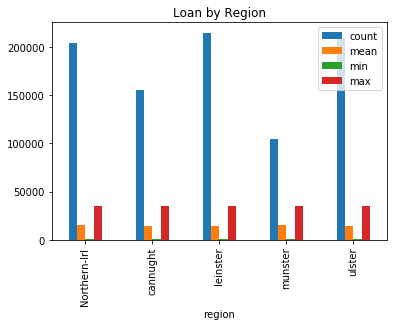

In [17]:
df2.plot(kind='bar', title='Loan by Region')


In [18]:
df2 = pd.DataFrame(stat2)

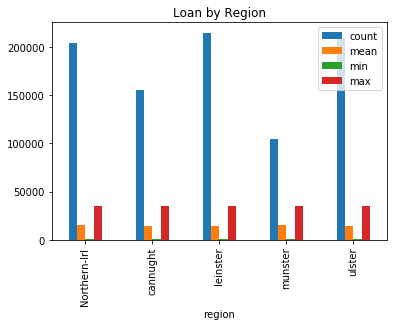

In [19]:
df2.plot(kind='bar', title='Loan by Region')

In [20]:
df.loan_condition.head(10)


0    Good Loan
1     Bad Loan
2    Good Loan
3    Good Loan
4    Good Loan
5    Good Loan
6    Good Loan
7    Good Loan
8     Bad Loan
9     Bad Loan
Name: loan_condition, dtype: object

In [21]:
badloans_df = df.loc[df["loan_condition_cat"] == 1]

In [22]:
goodloans_df = df.loc[df["loan_condition_cat"] == 0]


In [23]:
loan_status_cross_region = pd.crosstab(badloans_df['region'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_cross_region

loan_condition_cat,1
region,
Northern-Irl,23.925907
cannught,15.984220
leinster,24.735648
munster,10.984888
ulster,24.369337


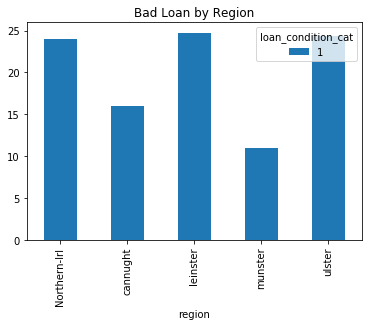

In [26]:
loan_status_cross_region.plot(kind='bar', title='Bad Loan by Region')


In [25]:

loan_status_cross_year = pd.crosstab(badloans_df['year'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_cross_year

loan_condition_cat,1
year,
2007,0.234321
2008,0.735589
2009,1.072239
2010,2.611636
2011,4.891071
2012,12.522802
2013,26.835635
2014,33.156357
2015,17.940352


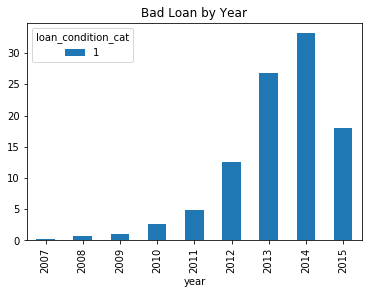

In [27]:
loan_status_cross_year.plot(kind='bar', title='Bad Loan by Year')


In [28]:
loan_status=df[df.loan_condition_cat== 1].emp_length_int.value_counts()

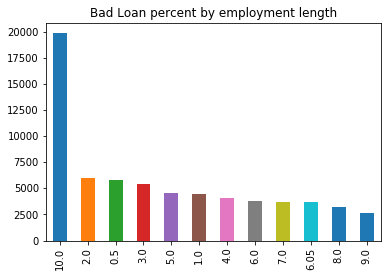

In [29]:
loan_status.plot(kind='bar', title='Bad Loan percent by employment length')


In [30]:
loan_status=df[df.loan_condition_cat== 1].home_ownership_cat.value_counts()


In [31]:
a = df.home_ownership_cat.unique()


In [32]:
b = df.home_ownership.unique()


In [33]:
c = pd.DataFrame(a,b)
c

,0
RENT,1
OWN,2
MORTGAGE,3
OTHER,4
NONE,5
ANY,6


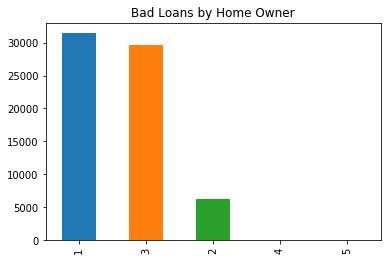

In [34]:
loan_status.plot(kind='bar', title='Bad Loans by Home Owner')


In [35]:
a = df.income_category.unique()
b = df.income_cat.unique()

In [36]:
c = pd.DataFrame(a,b)
c

,0
1,Low
2,Medium
3,High


In [37]:
loan_status=df[df.loan_condition_cat== 1].income_cat.value_counts()


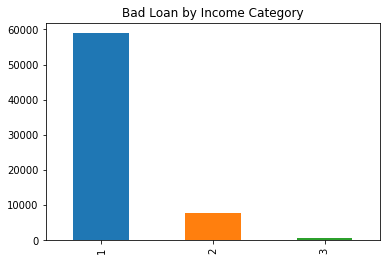

In [38]:
loan_status.plot(kind='bar', title='Bad Loan by Income Category')


In [39]:
a = df.application_type.unique()
b = df.application_type_cat.unique()

In [40]:
c = pd.DataFrame(a,b)
c

,0
1,INDIVIDUAL
2,JOINT


In [41]:
loan_status=df[df.loan_condition_cat== 1].application_type_cat.value_counts()


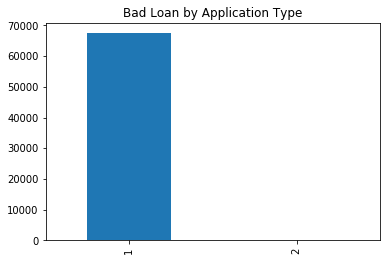

In [42]:
loan_status.plot(kind='bar', title='Bad Loan by Application Type')


In [43]:
#No joint applications in the dataset


In [44]:
a = df.purpose.unique()
b = df.purpose_cat.unique()
c = pd.DataFrame(a,b)
c

,0
1,credit_card
2,car
3,small_business
4,other
5,wedding
6,debt_consolidation
7,home_improvement
8,major_purchase
9,medical
10,moving


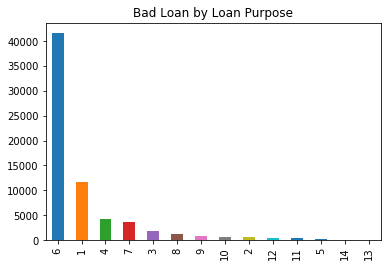

In [45]:
loan_status=df[df.loan_condition_cat== 1].purpose_cat.value_counts()
loan_status.plot(kind='bar', title='Bad Loan by Loan Purpose')

In [46]:
a = df.interest_payments.unique()
b = df.interest_payment_cat.unique()
c = pd.DataFrame(a,b)
c

,0
1,Low
2,High


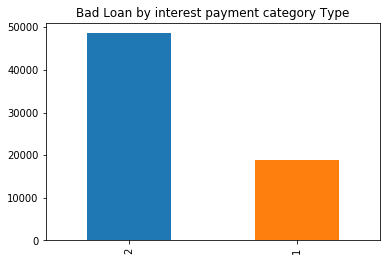

In [47]:
loan_status=df[df.loan_condition_cat== 1].interest_payment_cat.value_counts()
loan_status.plot(kind='bar', title='Bad Loan by interest payment category Type')

In [48]:
a = df.grade.unique()
b = df.grade_cat.unique()
c = pd.DataFrame(a,b)
c

,0
2,B
3,C
1,A
5,E
6,F
4,D
7,G


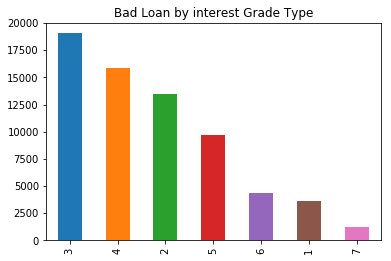

In [49]:

loan_status=df[df.loan_condition_cat== 1].grade_cat.value_counts()
loan_status.plot(kind='bar', title='Bad Loan by interest Grade Type')

In [50]:

loan_status_cross_region = pd.crosstab(badloans_df['region'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_cross_region

loan_condition_cat,1
region,
Northern-Irl,23.925907
cannught,15.984220
leinster,24.735648
munster,10.984888
ulster,24.369337


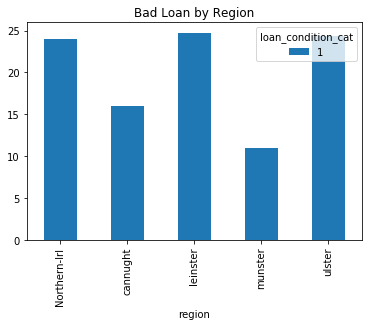

In [51]:
loan_status_cross_region.plot(kind='bar', title='Bad Loan by Region')


In [52]:
stat4 = df.groupby('region').interest_rate.mean()
stat4

region
Northern-Irl    13.200422
cannught        13.226123
leinster        13.359220
munster         13.187215
ulster          13.221563
Name: interest_rate, dtype: float64

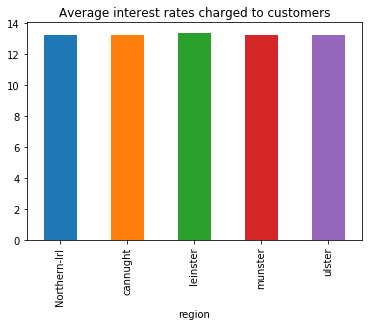

In [53]:
stat4.plot(kind='bar', x='region', y='interest rate', title='Average interest rates charged to customers')


In [54]:
# Average interest rates are very similar throughout regions

In [55]:
stat4 = df.groupby('year').interest_rate.mean()
stat4

year
2007    11.825108
2008    12.061964
2009    12.437247
2010    11.985268
2011    12.223746
2012    13.637676
2013    14.531745
2014    13.771245
2015    12.601731
Name: interest_rate, dtype: float64

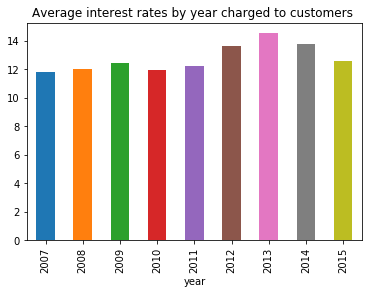

In [56]:
stat4.plot(kind='bar', x='year', y='interest rate', title='Average interest rates by year charged to customers ')

In [57]:
stat4 = df.groupby('year').dti.mean()
stat4

year
2007    10.709519
2008    13.204605
2009    12.466548
2010    13.095154
2011    13.846331
2012    16.661354
2013    17.216032
2014    18.040782
2015    19.196014
Name: dti, dtype: float64

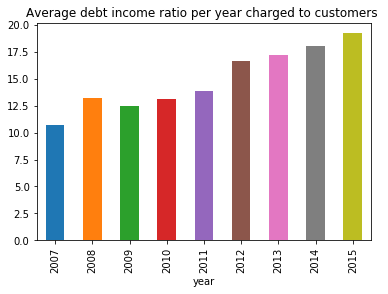

In [58]:
stat4.plot(kind='bar', x='year', y='debt income ratio ', title='Average debt income ratio per year charged to customers ')

In [66]:
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 20 numeric and 10 categorical columns in train data


In [67]:
del numeric_data['id']

In [68]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

(loan_amount             1.000000
installment             0.944977
total_pymnt             0.474626
term_cat                0.411717
total_rec_prncp         0.390473
income_cat              0.359688
annual_inc              0.332697
home_ownership_cat      0.196269
grade_cat               0.150873
interest_rate           0.145023
interest_payment_cat    0.112867
emp_length_int          0.103898
year                    0.103722
recoveries              0.073150
dti                     0.020675
Name: loan_amount, dtype: float64, '\n')
----------------------
dti                     0.020675
application_type_cat    0.013192
loan_condition_cat      0.003512
final_d                -0.023783
purpose_cat            -0.037038
Name: loan_amount, dtype: float64


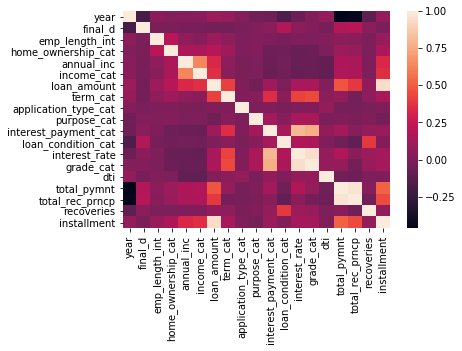

In [70]:
corr = numeric_data.corr()
sns.heatmap(corr)
#Feature Evaluation for loan amount
print (corr['loan_amount'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['loan_amount'].sort_values(ascending=False)[-5:]) #last 5 values

(annual_inc              1.000000
income_cat              0.630750
loan_amount             0.332697
installment             0.326181
total_pymnt             0.160879
home_ownership_cat      0.154832
total_rec_prncp         0.149993
emp_length_int          0.063382
term_cat                0.058360
year                    0.035911
recoveries              0.007717
purpose_cat             0.004787
application_type_cat   -0.006071
final_d                -0.013948
loan_condition_cat     -0.034142
Name: annual_inc, dtype: float64, '\n')
----------------------
loan_condition_cat     -0.034142
interest_payment_cat   -0.063125
grade_cat              -0.064426
interest_rate          -0.072785
dti                    -0.087409
Name: annual_inc, dtype: float64


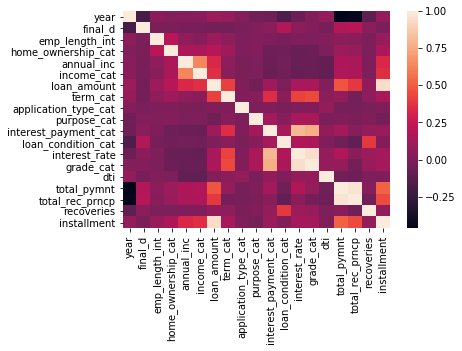

In [75]:
corr = numeric_data.corr()
sns.heatmap(corr)
#Feature Evaluation for annual income
print (corr['annual_inc'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['annual_inc'].sort_values(ascending=False)[-5:]) #last 5 values

(interest_rate           1.000000
grade_cat               0.954146
interest_payment_cat    0.802237
term_cat                0.428058
loan_condition_cat      0.175450
total_pymnt             0.170506
purpose_cat             0.158082
loan_amount             0.145023
installment             0.133075
recoveries              0.106840
dti                     0.079903
total_rec_prncp         0.054975
final_d                 0.049275
application_type_cat    0.010545
emp_length_int          0.008943
Name: interest_rate, dtype: float64, '\n')
----------------------
emp_length_int        0.008943
year                 -0.063632
home_ownership_cat   -0.064271
annual_inc           -0.072785
income_cat           -0.080198
Name: interest_rate, dtype: float64


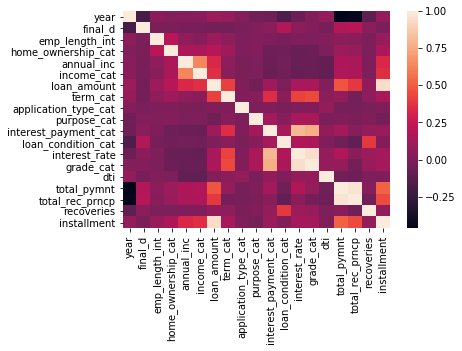

In [77]:
#Feature Evaluation for interest rate
corr = numeric_data.corr()
sns.heatmap(corr)
print (corr['interest_rate'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['interest_rate'].sort_values(ascending=False)[-5:]) #last 5 values

(recoveries              1.000000
loan_condition_cat      0.390846
interest_rate           0.106840
grade_cat               0.091268
interest_payment_cat    0.076371
installment             0.074546
loan_amount             0.073150
term_cat                0.057290
final_d                 0.041700
total_pymnt             0.038361
purpose_cat             0.013751
annual_inc              0.007717
income_cat              0.005564
emp_length_int          0.004163
home_ownership_cat      0.003483
Name: recoveries, dtype: float64, '\n')
----------------------
home_ownership_cat      0.003483
dti                     0.001162
application_type_cat   -0.002690
total_rec_prncp        -0.037742
year                   -0.100694
Name: recoveries, dtype: float64


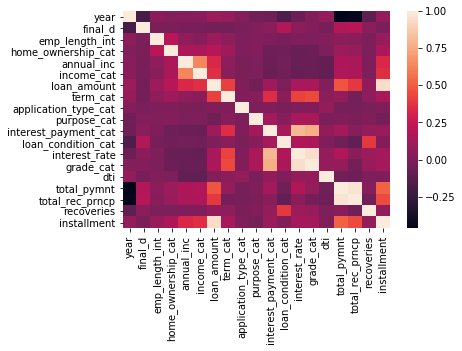

In [76]:
corr = numeric_data.corr()
sns.heatmap(corr)
#Feature Evaluation for interest recoveries
#Not strongly linked to any other columns
print (corr['recoveries'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['recoveries'].sort_values(ascending=False)[-5:]) #last 5 values

C:\Users\David\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


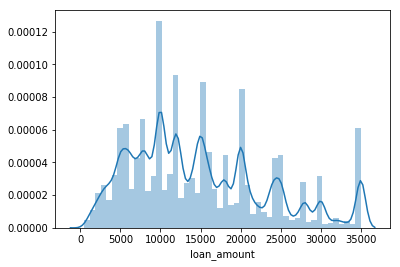

In [78]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm
sns.distplot(df['loan_amount'])

In [79]:
pivot = numeric_data.pivot_table(index='loan_amount', values='installment', aggfunc=np.median)


In [80]:
pivot

,installment
loan_amount,
500,16.080
550,18.280
600,20.290
700,23.350
725,22.510
750,25.020
800,25.800
850,29.080
900,29.725


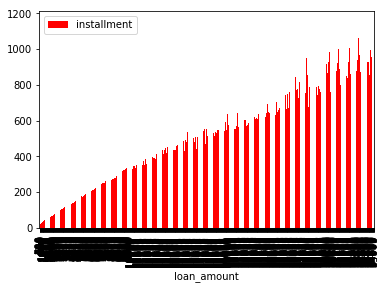

In [82]:
pivot.plot(kind='bar', color='red')

In [83]:
## Naturally loan installment amount increases to match the loan amount which explains why it is a good feature for loan amount

In [84]:
location = {'munster': 1,'leinster': 2,'cannught': 3,'ulster': 4,'Northern-Irl': 5} 

In [85]:
df.region = [location[item] for item in df.region] 


In [86]:
## Make region numeric


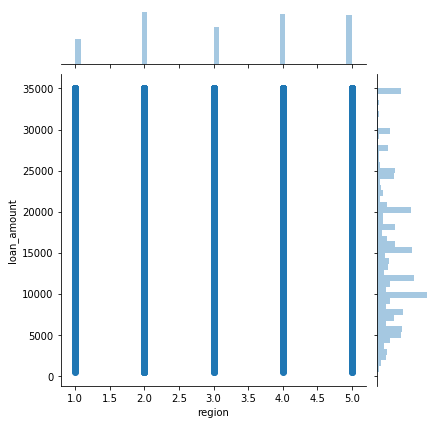

In [87]:
sns.jointplot(x=df['region'], y=df['loan_amount'])

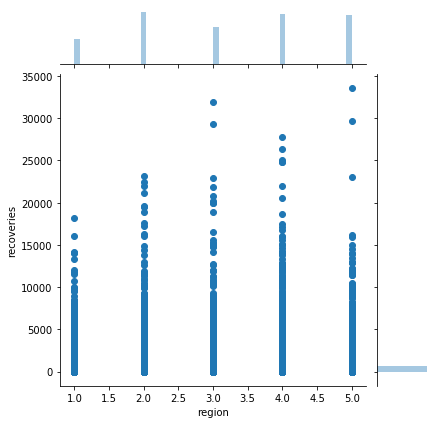

In [89]:
sns.jointplot(x=df['region'], y=df['recoveries'])

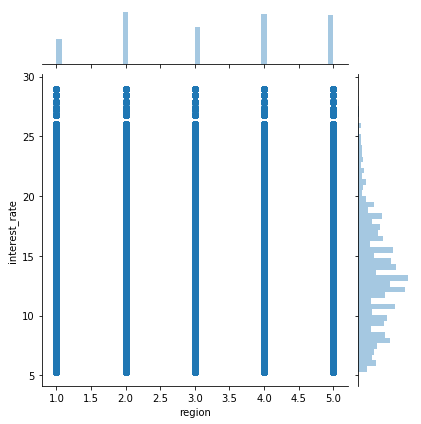

In [90]:
sns.jointplot(x=df['region'], y=df['interest_rate'])

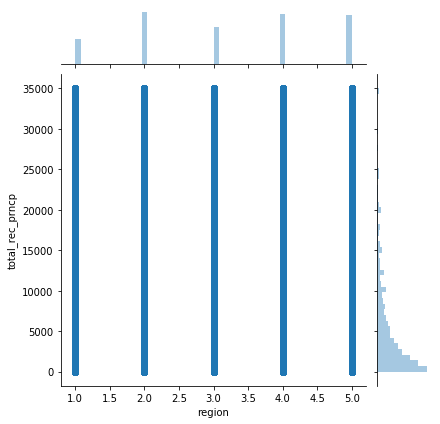

In [91]:
sns.jointplot(x=df['region'], y=df['total_rec_prncp'])

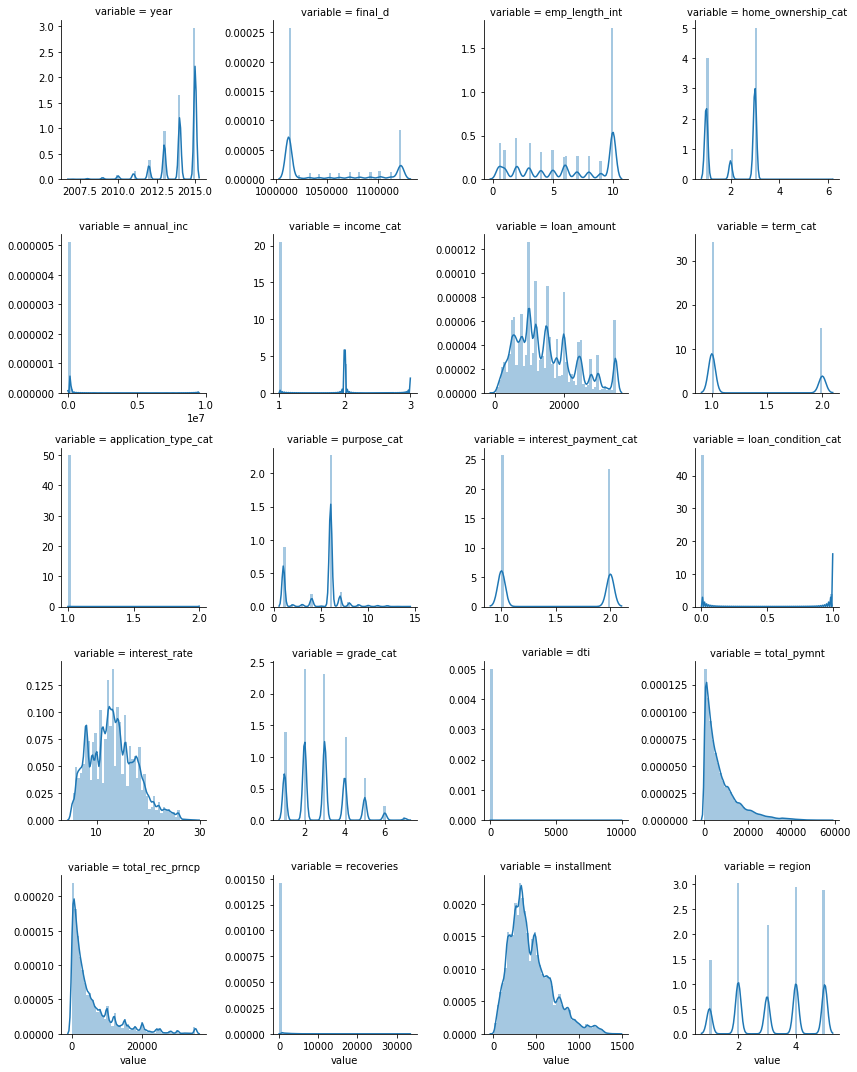

In [92]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
num.remove('id')
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1